https://qiskit-community.github.io/qiskit-nature/tutorials/06_qubit_mappers.html?utm_source=chatgpt.com

# Theory

When atoms come together to form molecules, their atomic orbitals combine to form molecular orbitals. The arrangement and energy levels of electrons within these molecular orbitals dictate the properties of the resulting molecule and the strength of the chemical bonds. For instance, in the formation of a hydrogen molecule (H2) from two individual hydrogen atoms, the electron from each atom occupies atomic orbitals. As the atoms approach each other, these atomic orbitals overlap and combine to form new molecular orbitals — one with lower energy **(a bonding orbital)** and one with higher energy **(an anti-bonding orbital)**. 

The two electrons, one from each hydrogen atom, will preferentially occupy the lower-energy bonding orbital, leading to the formation of a stable covalent bond that holds the H2 molecule together. The energy difference between the separated atoms and the formed molecule, particularly the energy of the electrons in the molecular orbitals, determines the stability and properties of the bond.

---

We want to simulate $H_2$ on a quantum computer. The first step is to recognize that a molecule is not just a static arangement of atoms but rather a collection of electrons moving in the electric field of nuclei. The electrons will experience a Coulomb force of attraction to the nuclei and a repulsive force between each other. 

## Second quantization:

We use second quantization to describe the energies of the electrons. This is made up of two parts:

1. **Single-electron terms**: energy of an electron in an orbital, including kinetic energy and attraction to nuclei.

2. **Two-electron terms**: repulsion between pairs of electrons in different orbitals.

$$H = \sum_{p,q} h_{pq}\, a_p^\dagger a_q + \frac{1}{2} \sum_{p,q,r,s} h_{pqrs}\, a_p^\dagger a_q^\dagger a_r a_s$$


Physical interpretation:

$a_p^\dagger a_p \rightarrow$ electron sitting in orbital p

$a_p^\dagger a_q \rightarrow$ electron hopping from orbital p to orbital q

$a_p^\dagger a_q^\dagger a_r a_s \rightarrow$ electron-electron repulsion

The coefficients $h_{pq}$ and $h_{pqrs}$ are one and two-electron overlap intergrals, containing all the physical information about the molecule. 

### 1️⃣ One-electron integrals $(h_{pq}$)

* These describe the energy of a single electron moving in the **field of the nuclei**.  

* Mathematically, they are written as:  

$$
h_{pq} = \int \chi_p^*(\mathbf{r}) \left( -\frac{1}{2}\nabla^2 - \sum_A \frac{Z_A}{|\mathbf{r}-\mathbf{R}_A|} \right) \chi_q(\mathbf{r}) \, d\mathbf{r}
$$

* **Interpretation:**
  * $Z_A$ is the proton number  
  * Diagonal ($p = q$) → energy of an electron sitting in orbital \(p\)  
  * Off-diagonal ($p \neq q$) → “hopping” energy — how likely an electron can move from orbital \(q\) to \(p\)  

---

### 2️⃣ Two-electron integrals $(h_{pqrs}$)

* These describe **electron-electron repulsion**, i.e., how the presence of one electron affects another:  

$$
h_{pqrs} = \int \int \frac{\chi_p^*(\mathbf{r}_1) \chi_q^*(\mathbf{r}_2) \chi_r(\mathbf{r}_1) \chi_s(\mathbf{r}_2)}{|\mathbf{r}_1 - \mathbf{r}_2|} \, d\mathbf{r}_1 \, d\mathbf{r}_2
$$

* **Interpretation:**  
  * Measures the Coulomb repulsion between electrons in orbitals $(p,r)$ and $(q,s)$  
  * Larger values → stronger repulsion, contributing more to the total energy  
 

---

### The role of the basis set

We now hit a practical problem: how do we **compute these integrals**? We need to know the shapes of the orbitals $\chi_p$ and $\chi_q$. This is where a **basis set** comes in.

* A **basis set** is a predefined set of functions (atomic-like orbitals) that we use to expand the molecular orbitals.  

* Common choices:  
  * **Slater-type orbitals (STO):** decay like true atomic orbitals, very accurate but harder to integrate  
  * **Gaussian-type orbitals (GTO):** decay like $e^{-\alpha r^2}$, much easier to integrate analytically  
  * **STO-nG:** approximate Slater orbitals using $n$ Gaussians (e.g., STO-6G)  

* By choosing a basis set, we **reduce the problem of computing integrals over continuous space to computing integrals over known functions**. This is what allows software like PySCF or Psi4 to output the $h_{pq}$ and $h_{pqrs}$ **numerically**.  



## Mapping from Fermions to Qubits: Jordan-Wigner Transformation

So far, we have the second-quantized Hamiltonian:

$$
H = \sum_{p,q} h_{pq}\, a_p^\dagger a_q 
    + \frac{1}{2} \sum_{p,q,r,s} h_{pqrs}\, a_p^\dagger a_q^\dagger a_r a_s
$$

Here, $a_p^\dagger$ and $a_p$ are **fermionic operators**. They follow anti-commutation rules:

$$
\{ a_p, a_q^\dagger \} = \delta_{pq}, \quad \{ a_p, a_q \} = 0
$$

Quantum computers, however, work with **qubits**, which do **not naturally obey fermionic statistics**. We need a way to represent fermionic creation and annihilation operators as qubit operators while **preserving these anti-commutation rules**. This is where the **Jordan-Wigner (JW) mapping** comes in.

---

### 4.1 The idea of the JW mapping

* Each **qubit represents a spin-orbital**:  
  * $|0\rangle$ → orbital is empty  
  * $|1\rangle$ → orbital is occupied  

* The **JW mapping** translates the fermionic operators into **Pauli matrices**:

$$
a_p^\dagger \mapsto \frac{X_p - i Y_p}{2} \otimes Z_0 Z_1 \dots Z_{p-1}, \quad
a_p \mapsto \frac{X_p + i Y_p}{2} \otimes Z_0 Z_1 \dots Z_{p-1}
$$

* The **string of Z operators** keeps track of the **fermionic sign**: whenever we swap fermions, we pick up a minus sign.  

---

### 4.2 Physical interpretation

* After mapping:  
  * **Z operators** measure occupation of an orbital  
  * **XX + YY combinations** correspond to electron hopping/exchange between orbitals  
  * **ZZ combinations** capture electron-electron interactions  

* **Crucial point:** The JW mapping **does not change the physics** — it just rewrites the Hamiltonian in a language that qubits understand.  

---

### 4.3 Example: one-electron term

Consider the diagonal term $a_0^\dagger a_0$ (electron in orbital 0). Under JW:

$$
a_0^\dagger a_0 \mapsto \frac{1 - Z_0}{2}
$$

* The coefficient $h_{00}$ from the one-electron integral remains the same.  
* The operator now **measures whether qubit 0 is in state $|1\rangle$**, corresponding to the orbital being occupied.  

Similarly, an off-diagonal hopping term $a_0^\dagger a_1 + a_1^\dagger a_0$ maps to:

$$
a_0^\dagger a_1 + a_1^\dagger a_0 \mapsto \frac{1}{2} \left( X_0 X_1 + Y_0 Y_1 \right)
$$

* This captures the **quantum mechanical possibility of electrons exchanging between orbitals**.  

---

### H₂ Hamiltonian in 4‑qubit Jordan‑Wigner form

Below is the molecular Hamiltonian for the H₂ molecule in a **4‑qubit Jordan–Wigner encoding in an STO‑6G (minimal) basis**. Each term is a Pauli string multiplied by a real coefficient, derived from the one‑ and two‑electron integrals:

$$
\begin{aligned}
H_{\text{H}_2} = & \;\alpha_0\, I\!I\!I\!I 
+ \alpha_1\, Z_0 
+ \alpha_2\, Z_1 
+ \alpha_3\, Z_2 
+ \alpha_4\, Z_3 \\
&+ \alpha_5\, Z_0Z_1
+ \alpha_6\, Z_0Z_2
+ \alpha_7\, Z_1Z_2
+ \alpha_8\, Z_0Z_3
+ \alpha_9\, Z_1Z_3
+ \alpha_{10}\, Z_2Z_3 \\
&+ \alpha_{11}\, Y_0 Y_1 X_2 X_3
+ \alpha_{12}\, X_0 Y_1 Y_2 X_3
+ \alpha_{13}\, Y_0 X_1 X_2 Y_3
+ \alpha_{14}\, X_0 X_1 Y_2 Y_3.
\end{aligned}
$$

Here:
* $I\!I\!I\!I$ is the identity on all four qubits.  
* $Z_i$, $X_i$, $Y_i$ are Pauli operators acting on qubit $i$ (with $0$ the least significant qubit).  
* Terms like $Z_0Z_1$ mean $Z$ on qubit 0 and $Z$ on qubit 1 (identity on 2 and 3).  

The $\alpha_j$ coefficients are **real numbers** that come from evaluating the integrals $h_{pq}$ and $h_{pqrs}$ for a chosen internuclear distance (typically near equilibrium). They encode all the physics of the molecule and are exactly the ones you feed into VQE. :contentReference[oaicite:0]{index=0}

In code (e.g. Qiskit), this would be represented as a list of Pauli strings with coefficients, e.g.:



# Step 1: Building the problem Hamiltonian

First we need to build the electronic Hamiltonian for the $H_2$ molecule and map it from its fermionic representation to a qubit operator than can be executed on a quantum computer.

First, we use PySCFDriver from Qiskit Nature to perform a classical electronic structure calculation. This computes the molecular integrals for two hydrogen atoms separated by 0.735 Å using the STO-6G basis set. The result contains the second-quantized electronic Hamiltonian expressed in terms of fermionic creation and annihilation operators.

In [158]:
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto6g",  # minimal basis
)
problem = driver.run()
fermionic_op = problem.hamiltonian.second_q_op()
print(fermionic_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.3378280462325899 * ( +_0 +_0 -_0 -_0 )
+ 0.3326288267523016 * ( +_0 +_1 -_1 -_0 )
+ 0.3378280462325899 * ( +_0 +_2 -_2 -_0 )
+ 0.3326288267523016 * ( +_0 +_3 -_3 -_0 )
+ 0.09060902125379117 * ( +_0 +_0 -_1 -_1 )
+ 0.09060902125379117 * ( +_0 +_1 -_0 -_1 )
+ 0.09060902125379117 * ( +_0 +_2 -_3 -_1 )
+ 0.09060902125379117 * ( +_0 +_3 -_2 -_1 )
+ 0.09060902125379117 * ( +_1 +_0 -_1 -_0 )
+ 0.09060902125379117 * ( +_1 +_1 -_0 -_0 )
+ 0.09060902125379117 * ( +_1 +_2 -_3 -_0 )
+ 0.09060902125379117 * ( +_1 +_3 -_2 -_0 )
+ 0.3326288267523016 * ( +_1 +_0 -_0 -_1 )
+ 0.3500891119364292 * ( +_1 +_1 -_1 -_1 )
+ 0.3326288267523016 * ( +_1 +_2 -_2 -_1 )
+ 0.3500891119364292 * ( +_1 +_3 -_3 -_1 )
+ 0.3378280462325899 * ( +_2 +_0 -_0 -_2 )
+ 0.3326288267523016 * ( +_2 +_1 -_1 -_2 )
+ 0.3378280462325899 * ( +_2 +_2 -_2 -_2 )
+ 0.3326288267523016 * ( +_2 +_3 -_3 -_2 )
+ 0.09060902125379117 * ( +_2 +_0 -_1 -_3 )
+ 0.09060902125379117 * ( +_2

This operator is still written in terms of fermionic operators, which cannot be directly executed on qubits.

To make the Hamiltonian compatible with a quantum circuit, we apply the Jordan–Wigner transformation. This maps the occupation of spin-orbitals to qubits:

In [160]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(fermionic_op)

for pauli, coeff in qubit_jw_op.to_list():
    print(f"{pauli}  {coeff.real}")

IIII  -0.8181708140495739
IIIZ  0.17407509959369855
IIZI  -0.2242932982365726
IIZZ  0.12100990274925522
IZII  0.17407509959369855
IZIZ  0.16891402311629494
ZIII  -0.22429329823657265
ZIIZ  0.1663144133761508
YYYY  0.04530451062689558
XXYY  0.04530451062689558
YYXX  0.04530451062689558
XXXX  0.04530451062689558
IZZI  0.1663144133761508
ZIZI  0.1750445559682146
ZZII  0.12100990274925522


A different mapping we could use is the Parity Mapper. Instead of encoding each spin-orbital into its own qubit, it stores the cumulative parity where each qubit stores a 0 for even parity, and 1 for odd parity. Because the total number of electrons in the system is fixed, some qubits are completely determined and can be removed, allowing us to use fewer qubits while still fully representing the system.

In [19]:
from qiskit_nature.second_q.mappers import ParityMapper

mapper = ParityMapper(num_particles=problem.num_particles)
qubit_p_op = mapper.map(fermionic_op)

for pauli, coeff in qubit_p_op.to_list():
    print(f"{pauli}  {coeff.real}")

II  -1.060190619548084
IZ  0.398368397830271
ZI  -0.39836839783027106
ZZ  -0.011329752332207954
XX  0.18121804250758228


# Exact solution

In [169]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

h2_hamiltonian = SparsePauliOp.from_list(qubit_p_op.to_list())
 
# exact ground state energy of hamiltonian
nuclear_repulsion = 0.71997
A = np.array(h2_hamiltonian)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Electronic ground state energy (Hartree): ", min(eigenvalues).real)
print("Nuclear repulsion energy (Hartree): ", nuclear_repulsion)
print(
    "Total ground state energy (Hartree): ", min(eigenvalues).real + nuclear_repulsion
)
h2 = min(eigenvalues).real + nuclear_repulsion

Electronic ground state energy (Hartree):  -1.8659468483033672
Nuclear repulsion energy (Hartree):  0.71997
Total ground state energy (Hartree):  -1.1459768483033672


# Step 2: Build an ansatz

Now that we have a Hamiltonian, we want to find its ground state. To do this, we prepare trial quantum states and compute their expectation value with the Hamiltonian (which gives the energy of that state). We create parameterized quantum circuits to build these trial states, then vary the parameters until we converge on a minimum energy.

These trial states are called an ansatz (a German word meaning “approach” or “method”). The better our ansatz can represent the true ground state, the closer our minimum energy will be to the actual ground state energy.

### Two qubit ansatz - if we wanted to solve the parity mapped form of our hamiltonian, then we only need to build an ansatz circuit with 2 qubits. The simplest form would be one parameter for each qubit. 

It is important to include CX gates when building your ansatz circuit as the true ground state of the system is unlikely to be a product state.

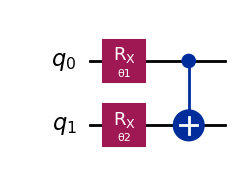

In [267]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

theta1 = Parameter("θ1")
theta2 = Parameter("θ2")

ansatz2q_1 = QuantumCircuit(2)
ansatz2q_1.rx(theta1, 0)
ansatz2q_1.rx(theta2, 1)
ansatz2q_1.cx(0, 1)

ansatz2q_1.draw(output='mpl')

### Energy landscape of our simple ansatz

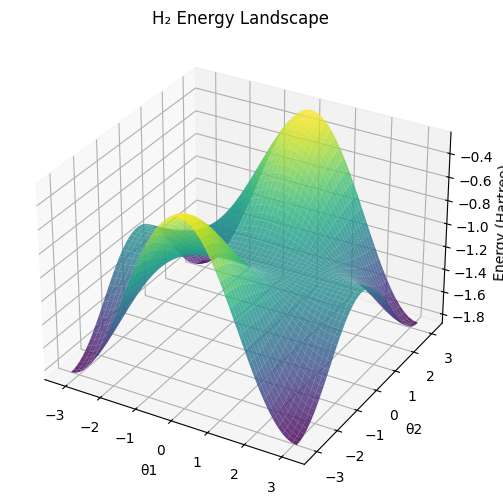

In [ ]:
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

num_points = 50
theta1_vals = np.linspace(-np.pi, np.pi, num_points)
theta2_vals = np.linspace(-np.pi, np.pi, num_points)

energies_2d = np.zeros((num_points, num_points))
ansatz = ansatz2q_1

for i, t1 in enumerate(theta1_vals):
    for j, t2 in enumerate(theta2_vals):
        bind_dict = {theta1: t1, theta2: t2}
        bound_qc = ansatz.assign_parameters(bind_dict)
        state = Statevector.from_instruction(bound_qc)
        energies_2d[i, j] = state.expectation_value(qubit_p_op).real
        

T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T1, T2, energies_2d.T, cmap='viridis', alpha=0.8)

ax.set_xlabel("θ1")
ax.set_ylabel("θ2")
ax.set_zlabel("Energy (Hartree)")
ax.set_title("H₂ Energy Landscape")
plt.show()

### We might decide that our system demands more complexity and therefore add more parameters to explore more of the Hilbert space. This naturally comes at the price of increasing computational cost.

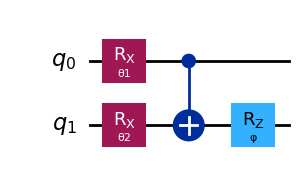

In [138]:
theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
phi = Parameter("φ")

ansatz2q_2 = QuantumCircuit(2)
ansatz2q_2.rx(theta1, 0)
ansatz2q_2.rx(theta2, 1)
ansatz2q_2.cx(0, 1)
ansatz2q_2.rz(phi, 1)

ansatz2q_2.draw(output='mpl')

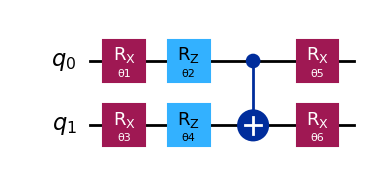

In [166]:
theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
theta3 = Parameter("θ3")
theta4 = Parameter("θ4")
theta5 = Parameter("θ5")
theta6 = Parameter("θ6")

ansatz2q_3 = QuantumCircuit(2)

# First rotation layer
ansatz2q_3.rx(theta1, 0)
ansatz2q_3.rz(theta2, 0)
ansatz2q_3.rx(theta3, 1)
ansatz2q_3.rz(theta4, 1)

# Entanglement
ansatz2q_3.cx(0, 1)

# Second rotation layer
ansatz2q_3.rx(theta5, 0)
ansatz2q_3.rx(theta6, 1)

ansatz2q_3.draw(output='mpl')

## Four qubit ansatz

If we want to solve the more complicated JW mapped form of our hamiltonian, then we need to build a four qubit ansatz. We could build an ansatz circuit in the same way we did for the 2 qubit problem, however qiskit also has prebuilt functions that we can utilize. Efficient SU2 is a commonly-used ansatz.

An efficient_su_2 circuit consists of layers of single qubit operations spanned by SU(2) (special unity group of degree 2, like Pauli rotation gates) and CX entanglements. This is a heuristic pattern that can be useful in variational quantum algorithms like VQE and classification circuits in quantum machine learning (QML).

We'll start with a four-qubit example efficient_su2 circuit with two types of SU(2) gates, say rx and y. We also specify an entanglement scheme and the number of repetitions. 

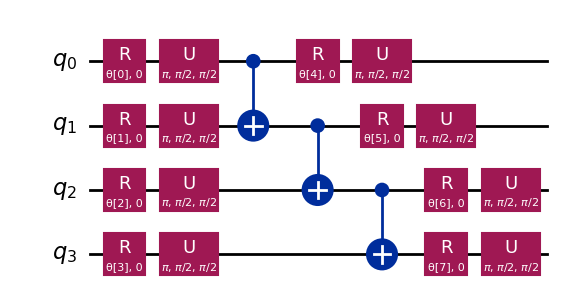

In [216]:
from qiskit.circuit.library import efficient_su2
 
SU2_ansatz = efficient_su2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
SU2_ansatz.decompose().draw(output="mpl")

The SU(2) gates appear at the beginning and end with the order and elements as specified in su2_gates = [...]. The entanglement scheme linear means that the CX gates step through the numbered qubits, entangling 0 & 1, then 1 & 2, and so on, down a diagonal line in the circuit. As you might expect, setting reps = 2 simply adds an entanglement layer and an ending SU(2) layer. Settings reps = n corresponds to n entanglement layers, with SU(2) layers between them and on each end.

A generalization of the efficient_su2 is the two-local circuit, which is itself a special case of the n-local circuits. The two-local circuits also contains SU(2) blocks (or rotation blocks) and entanglement blocks. Here, we are free to specify the type of entanglement gates we want to use, for example CRX gates. In this example, all gates accept a parameter, but that need not be the case. One could use Y rotation gates and CX entanglement gates, for example.

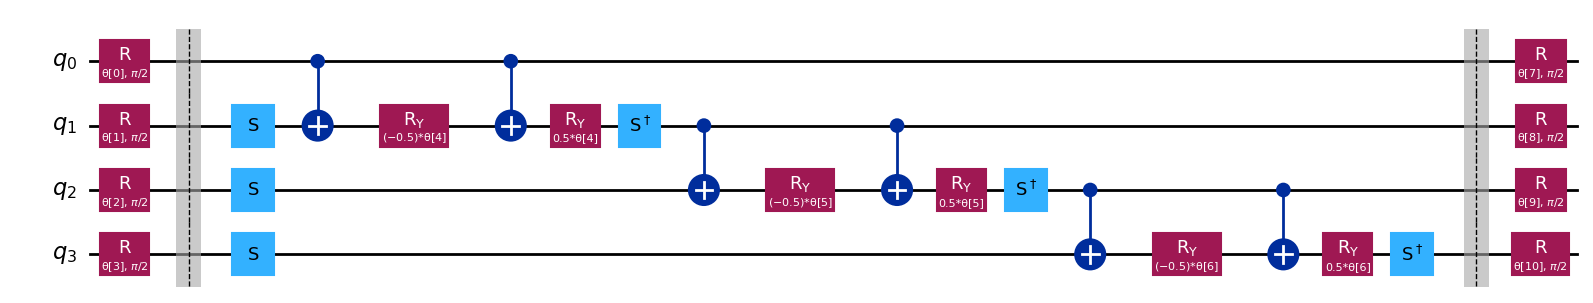

In [223]:
from qiskit.circuit.library import n_local
 
rotation_blocks = ["ry"]
entanglement_blocks = ["crx"]
two_ansatz = n_local(
    4, rotation_blocks, entanglement_blocks, "linear", insert_barriers=True, reps=1
)
two_ansatz.decompose().draw(output="mpl")

# Step 3: Transpile ansatz circuit onto (fake) backend hardware

Backend: {config.backend_name}
Native gates:  ['cx', 'id', 'delay', 'measure', 'reset', 'rz', 'sx', 'x', 'if_else', 'for_loop', 'switch_case'] ,


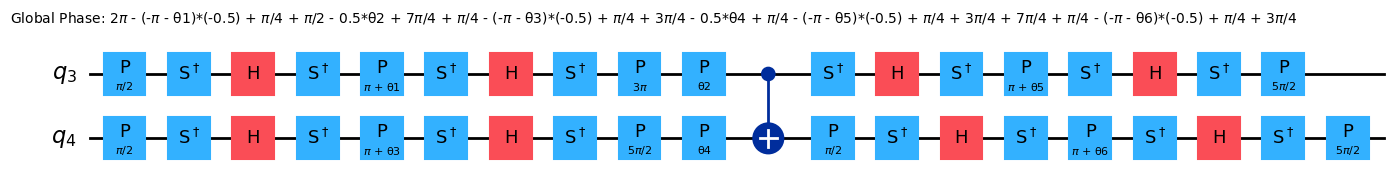

In [268]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

fake_backend = FakeManilaV2() 
noise_model = NoiseModel.from_backend(fake_backend)

backend_sim = AerSimulator(noise_model=noise_model)
config = fake_backend.configuration()
 
print("Backend: {config.backend_name}")
print("Native gates: ", config.supported_instructions, ",")
 
 
target = fake_backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz=ansatz2q_3

ansatz_isa = pm.run(ansatz)
ansatz_isa.decompose().draw(output="mpl", idle_wires=False)

### During transpilation, Qiskit may remap logical qubits to different physical qubits. Therefore it is important to remap the problem hamiltonian to the new layout

In [269]:
h2_hamiltonian_isa = h2_hamiltonian.apply_layout(layout=ansatz_isa.layout)

# Step 4: Define a cost function

This function computes the energy of the current trial state during the VQE optimization.

It takes the current circuit parameters, prepares the corresponding quantum state using the ansatz, and uses the Estimator to calculate the expectation value of the Hamiltonian — which is the energy of that state.

In [270]:
def cost_func(params, ansatz, hamiltonian, estimator, cost_history_dict):
    """Return estimate of energy from estimator
 
    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results
 
    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]
 
    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")
 
    return energy

# Step 5: Minimize the hamiltonian expectation value by varying the parameters

In [271]:
from scipy.optimize import minimize
from qiskit_ibm_runtime import EstimatorV2 as Estimator

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}
estimator = Estimator(backend_sim)
estimator.options.default_shots = 10000
 
iterations = 100

# Initial guess
x0 = [0]*len(ansatz.parameters)
x0[0] = 2

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa, h2_hamiltonian_isa, estimator, cost_history_dict),
    method="cobyla",
    options={"maxiter": iterations, "tol": 1e-12},
)

Iters. done: 1 [Current cost: -1.0702050146145485]
Iters. done: 2 [Current cost: -1.0764801217256994]
Iters. done: 3 [Current cost: -1.0535296871160325]
Iters. done: 4 [Current cost: -1.2400391962975228]
Iters. done: 5 [Current cost: -1.2375222416274443]
Iters. done: 6 [Current cost: -1.0740467191777263]
Iters. done: 7 [Current cost: -1.5947109649263742]
Iters. done: 8 [Current cost: -1.7759017366117906]
Iters. done: 9 [Current cost: -1.636782901909638]
Iters. done: 10 [Current cost: -1.784788612654855]
Iters. done: 11 [Current cost: -1.547816213748497]
Iters. done: 12 [Current cost: -1.7196081638613392]
Iters. done: 13 [Current cost: -1.6234886665102108]
Iters. done: 14 [Current cost: -1.5613800738992925]
Iters. done: 15 [Current cost: -1.8152993264437238]
Iters. done: 16 [Current cost: -1.808340862873342]
Iters. done: 17 [Current cost: -1.8131219780565253]
Iters. done: 18 [Current cost: -1.80215333535494]
Iters. done: 19 [Current cost: -1.8102979581172396]
Iters. done: 20 [Current co

In [272]:
h_vqe = res.fun
parameters = res.x
print("The reference ground state energy is ", min(eigenvalues).real)
print("The computed ground state energy is ", h_vqe)
print("Parameter vector is", parameters)

The reference ground state energy is  -1.8659468483033672
The computed ground state energy is  -1.8303737114785235
Parameter vector is [ 2.97626696e+00 -9.06600001e-01  1.31575431e+00  2.64119356e-03
 -6.84372310e-02  1.86098277e+00]


# Step 6: Post-processing

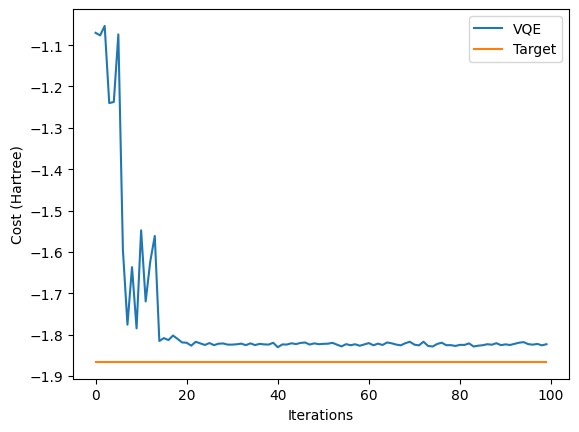

In [273]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0, 10, iterations)
 
# Define the constant function
y_constant = np.full_like(x, min(eigenvalues.real))
ax.plot(
    range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label="VQE"
)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost (Hartree)")
ax.plot(y_constant, label="Target")
plt.legend()
plt.draw()

# LiH

In [284]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer

# 1️⃣ Define the molecule
driver = PySCFDriver(
    atom="Li 0 0 0; H 0 0 1.6",
    basis="sto3g",
)

problem = driver.run()

# 2️⃣ Freeze core orbitals (important for Li!)
transformer = FreezeCoreTransformer()
problem = transformer.transform(problem)

# 3️⃣ (Optional but recommended) Define a small active space
# Keep 2 electrons in 2 spatial orbitals
active_space = ActiveSpaceTransformer(
    num_electrons=2,
    num_spatial_orbitals=2,
)
problem = active_space.transform(problem)

# 4️⃣ Get fermionic Hamiltonian
fermionic_op = problem.hamiltonian.second_q_op()

# 5️⃣ Map to qubits using Parity (with qubit reduction)
mapper = JordanWignerMapper()
qubit_op = mapper.map(fermionic_op)

lih_hamiltonian = SparsePauliOp.from_list(qubit_op.to_list())


theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
theta3 = Parameter("θ3")
theta4 = Parameter("θ4")

bad_ansatz = QuantumCircuit(4)
bad_ansatz.rx(theta1, 0)
bad_ansatz.rx(theta2, 1)
bad_ansatz.rx(theta3, 2)
bad_ansatz.rx(theta4, 3)

vqe(lih_hamiltonian, SU2_ansatz)

Iters. done: 1 [Current cost: -0.8458564138218505]
Iters. done: 2 [Current cost: -1.0318677945225236]
Iters. done: 3 [Current cost: -0.9573172475936006]
Iters. done: 4 [Current cost: -0.9960282612182987]
Iters. done: 5 [Current cost: -1.00706134291179]
Iters. done: 6 [Current cost: -0.9753116240834904]
Iters. done: 7 [Current cost: -1.018739350778195]
Iters. done: 8 [Current cost: -0.9713473463557609]
Iters. done: 9 [Current cost: -1.0087145328943183]
Iters. done: 10 [Current cost: -0.9483244852438624]
Iters. done: 11 [Current cost: -0.9828046802598311]
Iters. done: 12 [Current cost: -1.0342080069332724]
Iters. done: 13 [Current cost: -1.0310586573528517]
Iters. done: 14 [Current cost: -1.0319022398367943]
Iters. done: 15 [Current cost: -1.0314613533397428]
Iters. done: 16 [Current cost: -1.0309426978226008]
Iters. done: 17 [Current cost: -1.0297341454422162]
Iters. done: 18 [Current cost: -1.0316637217422182]
Iters. done: 19 [Current cost: -1.0334408214106925]
Iters. done: 20 [Current

( message: Return from COBYLA because the objective function has been evaluated MAXFUN times.
  success: False
   status: 3
      fun: -1.034664720952079
        x: [ 3.219e+00 -7.595e-02 -3.036e-02 -2.590e-02 -5.964e-02
            -1.240e-02 -5.988e-02 -3.123e-02]
     nfev: 100
    maxcv: 0.0,
 {'prev_vector': array([ 3.21902868, -0.07594921, -0.03036433, -0.02589936, -0.05964418,
         -0.01240072, -0.05988369, -0.03122536]),
  'iters': 100,
  'cost_history': [np.float64(-0.8458564138218505),
   np.float64(-1.0318677945225236),
   np.float64(-0.9573172475936006),
   np.float64(-0.9960282612182987),
   np.float64(-1.00706134291179),
   np.float64(-0.9753116240834904),
   np.float64(-1.018739350778195),
   np.float64(-0.9713473463557609),
   np.float64(-1.0087145328943183),
   np.float64(-0.9483244852438624),
   np.float64(-0.9828046802598311),
   np.float64(-1.0342080069332724),
   np.float64(-1.0310586573528517),
   np.float64(-1.0319022398367943),
   np.float64(-1.0314613533397

In [283]:
H = np.array(lih_hamiltonian)
eigenvalues, eigenvectors = np.linalg.eig(H)
print(min(eigenvalues))

(-1.0581165351365407+0j)


# Appendix

In [243]:
def transpile_ansatz(ansatz, hamiltonian, backend):

    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)
    ansatz_isa = pm.run(ansatz)

    h2_hamiltonian_isa = hamiltonian.apply_layout(layout=ansatz_isa.layout)

    return h2_hamiltonian_isa, ansatz_isa

In [279]:
def optimize_ansatz(ansatz_isa, hamiltonian, backend):

    cost_history_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    noise_model = NoiseModel.from_backend(backend)
    backend_sim = AerSimulator(noise_model=noise_model)
    estimator = Estimator(backend_sim)
    estimator.options.default_shots = 10000
    
    iterations = 100

    # Initial guess
    x0 = [0]*len(ansatz_isa.parameters)
    x0[0] = 2

    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian, estimator, cost_history_dict),
        method="cobyla",
        options={"maxiter": iterations, "tol": 1e-12},
    )
    
    return res, cost_history_dict

In [280]:
def vqe(h2_hamiltonian, ansatz):

    fake_backend = FakeManilaV2() 

    h2_hamiltonian_isa, ansatz_isa = transpile_ansatz(
        ansatz=ansatz, 
        hamiltonian=h2_hamiltonian, 
        backend=fake_backend)

    res, cost_history_dict = optimize_ansatz(
        ansatz_isa=ansatz_isa, 
        hamiltonian= h2_hamiltonian_isa, 
        backend=fake_backend)
    
    return res, cost_history_dict

In [260]:
h2_hamiltonian = SparsePauliOp.from_list(qubit_p_op.to_list())

cost_data = []
for ansatz in [ansatz2q_1, ansatz2q_2, ansatz2q_3]:
    _, cost_datum = vqe(h2_hamiltonian, ansatz=ansatz)
    cost_data.append(cost_datum)

Iters. done: 1 [Current cost: -1.0783569707486582]
Iters. done: 2 [Current cost: -1.0743048402959439]
Iters. done: 3 [Current cost: -1.1372804774949952]
Iters. done: 4 [Current cost: -1.2389131601240297]
Iters. done: 5 [Current cost: -1.653222548312797]
Iters. done: 6 [Current cost: -1.034576023644265]
Iters. done: 7 [Current cost: -0.7123297469987556]
Iters. done: 8 [Current cost: -1.568809206103418]
Iters. done: 9 [Current cost: -1.7893010036410062]
Iters. done: 10 [Current cost: -1.5175444822655126]
Iters. done: 11 [Current cost: -1.7824529144455232]
Iters. done: 12 [Current cost: -1.7487049793788023]
Iters. done: 13 [Current cost: -1.7711679880419102]
Iters. done: 14 [Current cost: -1.7973812937291078]
Iters. done: 15 [Current cost: -1.8058750620679784]
Iters. done: 16 [Current cost: -1.8183759783776214]
Iters. done: 17 [Current cost: -1.8099433943554981]
Iters. done: 18 [Current cost: -1.8065432197598317]
Iters. done: 19 [Current cost: -1.8150326051407937]
Iters. done: 20 [Current

In [22]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, DensityMatrix, Pauli
 
theta = Parameter("θ")
phi = Parameter("φ")
lam = Parameter("λ")
 
ansatz1 = QuantumCircuit(1)
ansatz1.rx(theta, 0)
 
ansatz2 = QuantumCircuit(1)
ansatz2.rx(theta, 0)
ansatz2.rz(phi, 0)
 
ansatz3 = QuantumCircuit(1)
ansatz3.rx(theta, 0)
ansatz3.rz(phi, 0)
ansatz3.rx(lam, 0)

In [51]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_bloch(bloch_vectors):
    # Extract X, Y, Z coordinates for 3D projection
    X_coords = bloch_vectors[:, 0]
    Z_coords = bloch_vectors[:, 2]
 
    # Compute Y coordinates from X and Z to approximate the full Bloch sphere projection
    Y_coords = bloch_vectors[:, 1]
 
    # Create 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X_coords, Y_coords, Z_coords, color="blue", alpha=0.6)
 
    # Labels and title
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Parameterized 1-Qubit Circuit on 3D Bloch Sphere")
 
    # Set axis limits and make them equal
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
 
    # Ensure equal aspect ratio for all axes
    ax.set_box_aspect([1, 1, 1])  # Equal scaling for x, y, z axes
 
    # Show grid
    ax.grid(True)
 
    plt.show()

def generate_bloch_vectors(ansatz, parameters, parameter_vals):
    
    num_samples = len(parameter_vals[0])
    bloch_vectors = []

    for i in range(num_samples):
        bind_dict = {
            param: values[i]
            for param, values in zip(parameters, parameter_vals)
        }

        bound_qc = ansatz.assign_parameters(bind_dict)
        state = Statevector.from_instruction(bound_qc)

        X = state.expectation_value(Pauli("X")).real
        Y = state.expectation_value(Pauli("Y")).real
        Z = state.expectation_value(Pauli("Z")).real

        bloch_vectors.append([X, Y, Z])
    
    bloch_vectors=np.array(bloch_vectors)

    plot_bloch(bloch_vectors)

    return np.array(bloch_vectors)

In [52]:
num_samples = 5000  # Number of random states
theta_vals = np.random.uniform(0, 2 * np.pi, num_samples)
phi_vals = np.random.uniform(0, 2 * np.pi, num_samples)
lam_vals = np.random.uniform(0, 2 * np.pi, num_samples)

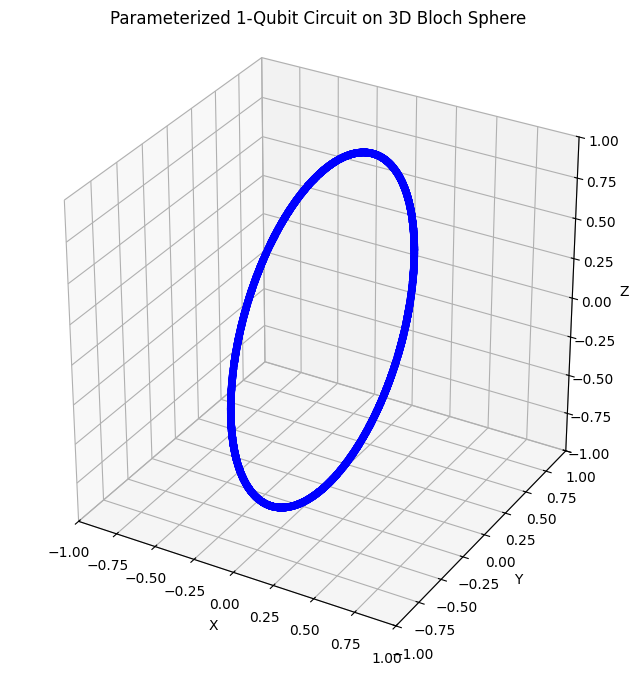

array([[ 0.        ,  0.68925044, -0.72452317],
       [ 0.        ,  0.4307724 , -0.9024606 ],
       [ 0.        , -0.46174971,  0.88701026],
       ...,
       [ 0.        ,  0.9728543 ,  0.23141847],
       [ 0.        ,  0.87523095, -0.48370527],
       [ 0.        , -0.5389365 ,  0.8423464 ]], shape=(5000, 3))

In [53]:
generate_bloch_vectors(ansatz=ansatz1, parameters=[theta], parameter_vals=[theta_vals])

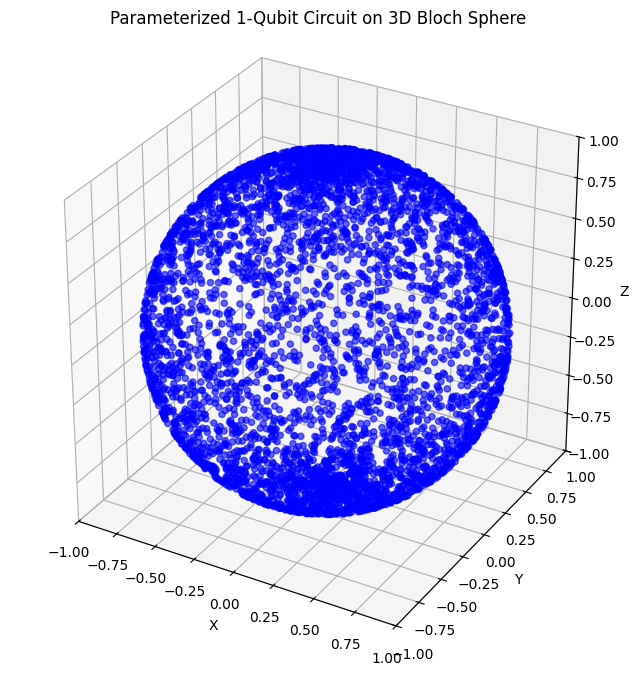

array([[-0.40889052,  0.55486459, -0.72452317],
       [-0.42000128, -0.09572769, -0.9024606 ],
       [-0.34676143,  0.30490868,  0.88701026],
       ...,
       [ 0.50661555,  0.83053367,  0.23141847],
       [-0.51463644,  0.70793965, -0.48370527],
       [-0.2920327 , -0.45295635,  0.8423464 ]], shape=(5000, 3))

In [54]:
generate_bloch_vectors(ansatz=ansatz2, parameters=[phi, theta], parameter_vals=[phi_vals, theta_vals])

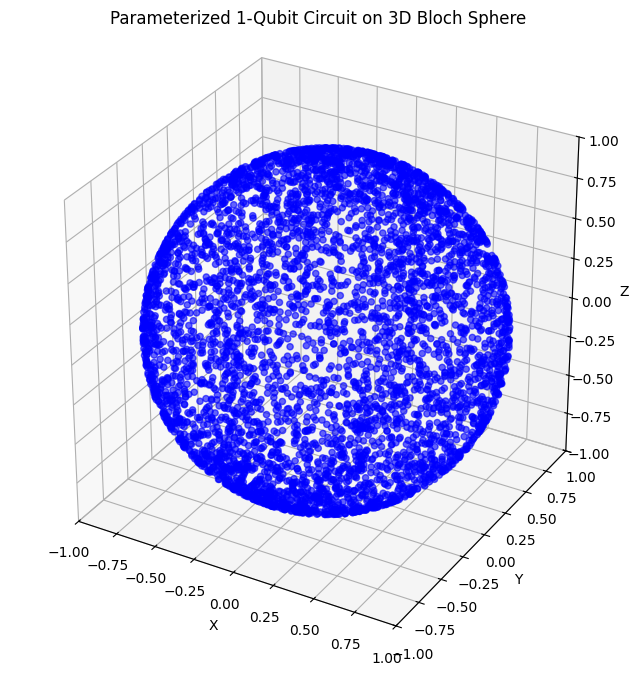

array([[-0.40889052, -0.45999248, -0.78817223],
       [-0.42000128, -0.87130032, -0.25383986],
       [-0.34676143,  0.80067155, -0.48855048],
       ...,
       [ 0.50661555,  0.52603842, -0.68309902],
       [-0.51463644,  0.79166053, -0.32927639],
       [-0.2920327 , -0.22210845,  0.93026058]], shape=(5000, 3))

In [56]:
generate_bloch_vectors(ansatz=ansatz3, parameters=[phi, theta, lam], parameter_vals=[phi_vals, theta_vals, lam_vals])

This circuit has  3 parameters


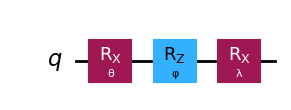

In [57]:
# Pre-defined ansatz circuit and operator class for Hamiltonian
 
ansatz = ansatz3
 
num_params = ansatz.num_parameters
print("This circuit has ", num_params, "parameters")
 
ansatz.draw("mpl", style="iqp")